In [1]:
import os
import sys
import glob
import pickle
import itertools
import random

from IPython.display import Image

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE

import numpy as np
import pandas as pd


import sys
sys.path.append('../')
from src import *

random.seed(1234)
np.random.seed(1234)
%matplotlib inline

In [19]:
OUTPUT_DIR = "/home/disij/projects/sandbox/fc_mondrian/output/"
PATH_TABLE = '/home/disij/projects/acdc/data/AML_benchmark/AML_table.csv'
PATH_DATA = "/home/disij/projects/sandbox/fc_mondrian/output/AML_corrected_table_predictions.csv.gz"

In [3]:
# load AML data and table

### LOAD DATA ###
df = pd.read_csv( PATH_DATA, sep=',', header = 0, \
                 compression = 'gzip', engine='python')
table = pd.read_csv(PATH_TABLE, sep=',', header=0, index_col=0)
table = table.fillna(0)

### PROCESS: discard ungated events ###
X = df[df.columns[:-2]].values
table_headers = list(table)

### transform data
data = np.arcsinh((X-1.)/5.)
N, d = data.shape
emp_bounds = np.array([[data[:,d].min(), data[:,d].max()] for d in range(data.shape[1])])
ct2idx = {x:i for i,x in enumerate(table.index)}
idx2ct = {i:x for i,x in enumerate(table.index)}

Y = np.array([ct2idx[_] for _ in df.cell_type])
Y_predict = np.array([ct2idx[_] for _ in df.MP_prediction])

# rename table header 'HLA-DR' to 'HLADR' to prevent error from '-'
temp_headers = list(table)
temp_headers[29] = "HLADR"
table.columns = temp_headers

In [4]:
table.at['Mature B cells','CD38'] = -1.0

Accuracy on data: 0.969


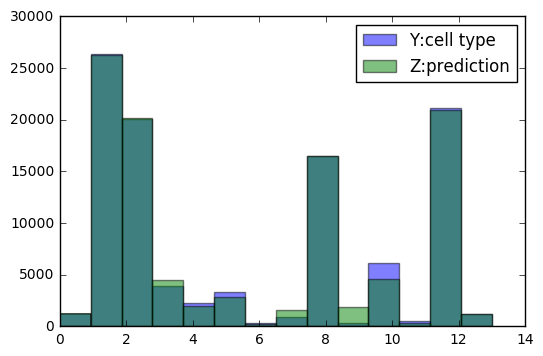

In [5]:
accuracy = sum(Y == Y_predict)*1.0/ data.shape[0]
print "Accuracy on data: %.3f" % accuracy

bins = table.shape[0]
plt.hist(Y, bins, alpha=0.5, label='Y:cell type')
plt.hist(Y_predict, bins, alpha=0.5, label='Z:prediction')
plt.legend(loc='upper right')
plt.show() 

In [28]:
cnf_matrix = confusion_matrix(Y, Y_predict)
class_names = table.index

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    INPUT:
        cm: np.matrix, confusion matrix (can be computed using sklearn)
        classes: a list of strings, each string represents the name of each class
        normalize: normalize cm by row or not
    OUTPUT:
        None
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=70,fontsize ="12")
    plt.yticks(tick_marks, classes,fontsize ="12")

#     fmt = '.2f' if normalize else 'd'
#     thresh = cm.max() / 2.
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         plt.text(j, i, format(cm[i, j], fmt),
#                  horizontalalignment="center",
#                  color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label',fontsize ="16")
    plt.xlabel('Predicted label',fontsize ="16")

np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True)
plt.savefig(OUTPUT_DIR + 'plots/AML_corrected_table_confusion_matrix.png', format='png',\
            dpi=2000)
plt.savefig(OUTPUT_DIR + 'plots/AML_corrected_table_confusion_matrix.pdf', format='pdf',\
            dpi=2000)
plt.savefig(OUTPUT_DIR + 'plots/AML_corrected_table_confusion_matrix.eps', format='eps',\
            dpi=2000)
plt.show()

In [7]:
%%time

idx_plot = np.random.randint(N, size=10000)
data_plot = data[idx_plot]
Y_plot = Y[idx_plot]
Y_predict_plot = Y_predict[idx_plot]

tsne = TSNE(n_components=2, random_state=1234)
Xre = tsne.fit_transform(data_plot)

CPU times: user 3min 13s, sys: 47.3 s, total: 4min 1s
Wall time: 3min 57s


/home/disij/projects/sandbox/fc_mondrian/output/plots/AML_corrected_table_tsne_true.pdf


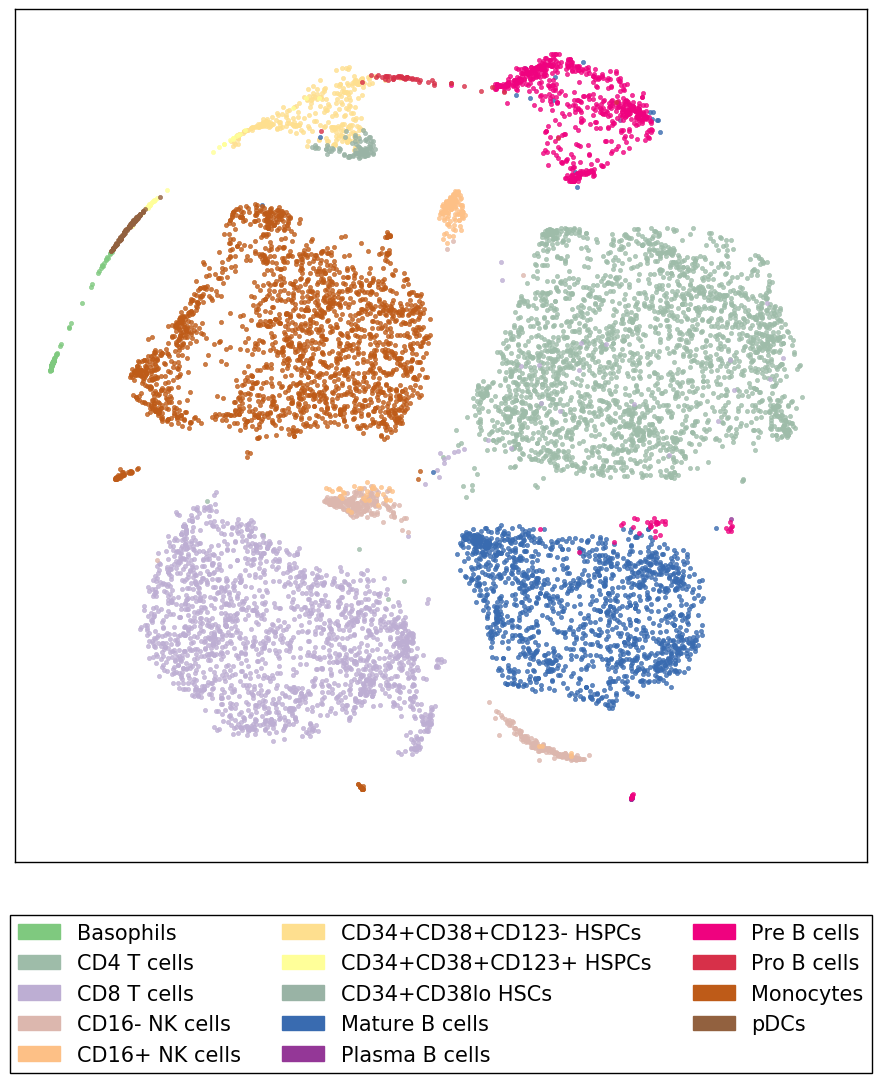

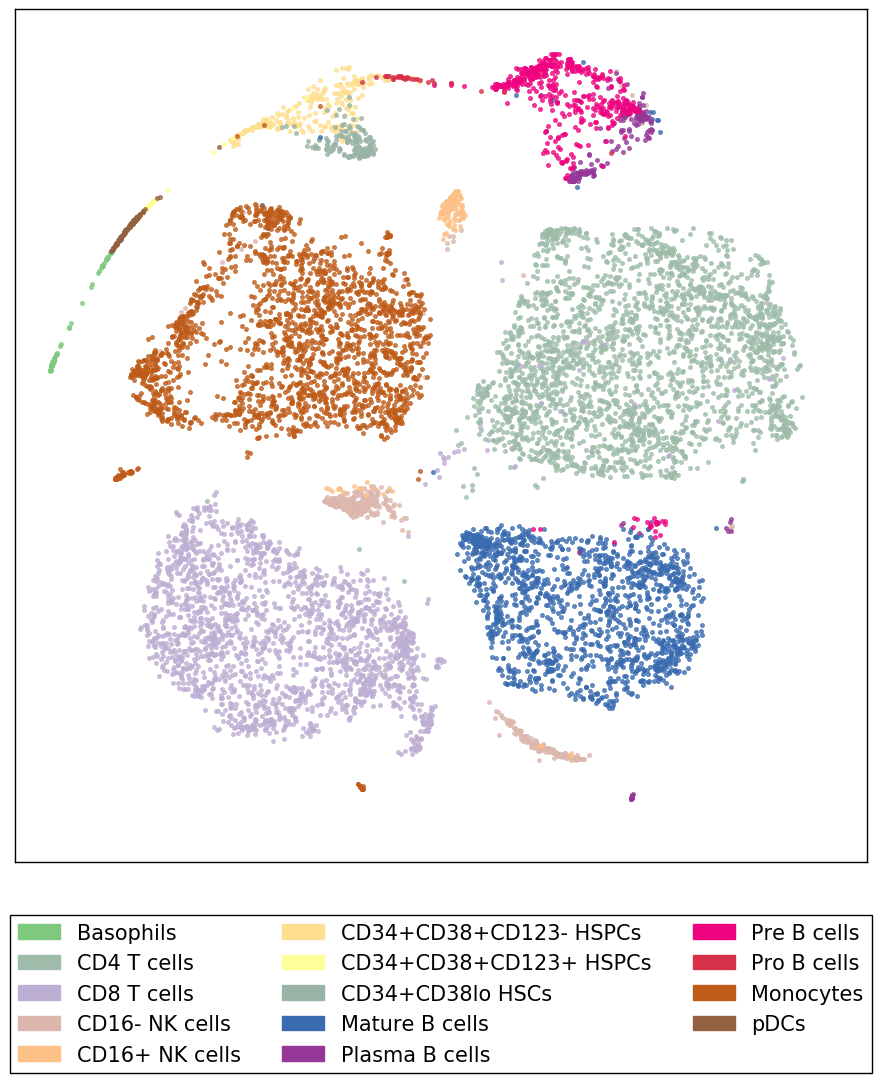

In [21]:
filename = OUTPUT_DIR + 'plots/AML_corrected_table_tsne_true.pdf'
print filename
plot_tsne(Xre, Y_plot, idx2ct, filename)
filename = OUTPUT_DIR + 'plots/AML_corrected_table_tsne_predict.pdf'
plot_tsne(Xre, Y_predict_plot, idx2ct, filename)